# The Scikit Learn Python Library Overview

The scikit-learn (Sklearn) library contains simple and efficient tools for predictive data analysis which makes it the ideal library for use in __data science__. 

It is the most useful python library used for machine learning. It provides a range of efficient tools for machine learning and statistical modeling [1]
It includes tools for:
- __Classification__: A process of categorizing a set of data into classes. Can be done on structured and unstructured data [2]
- __Regression__: Regression models are used to predict a continuous value.[3]
- __Clustering__ : Clustering is grouping unlabeled examples to understand a data set. Common applications of clustering includes social network analysis, search result grouping, medical imaging[4]
- __Dimensionality reduction__: Techniques that reduce the number of input variable in training data. High demensional data might have hundres, thousands or even millions of input variables. Fewer inputs means fewer parameters or a simpler structure in the machine learning model. [5]

SKlearn is built upon: 
- NumPy
- SciPy 
- Matplotlib.  

In order to give an insight of scikit learn I will explain what each of these libraries do.

__NumPy__: The standard library used for dealing with numerical data in python. It is mainly used for working with arrays and contains multi-dimensional arrays and matrix data structures.  
In addition, it has functions for working in domain of linear algebra, fourier transform, and matrices. NumPy is used because while python does provide an array implementation in the form of lists,  
they are slow to process. Numpy arrays are much faster, 50 times faster to process infact.  [19]
  
__This makes NumPy an ideal library to use for data science because processing speed is a huge factor.__


__SciPy__: Is built on top of NumPy, however it also has has optimized some existing functions in NumPy as well as added functions which are often used in Data Science. [20]

__Matplotlib__: Is used for data visualization and graphical plotting. It has a variety of different plots available for use. __Plots are key to viusalising datasets.__ 

## Features
The Scikit-learn library is focused on modeling data. Some of the most popular models in the library include:
- Supervised learning algorithms : Almost all of the popular learning algorithms are part of scikit-learn. E.g. Linear Regression, Support Vector Machine, Decision Tree
- Unsupervised learning algorithms: Also has the popular unsupervised learning algorithms. E.g. clustering, factor analysis, PCA.
- Cross Validation : Used to check the accuracy of supervised models on unseen data.
- Ensemble Methods: Used to check the accuracy of supervised models on unseen data.



### Estimators - Learning and Predicting
Sklearn provides dozens of estimators which are built-in machine learning algorithms and models[6]. Each estimator can be fitted to some data using its fit method. This allows the estimator to learn from the model.

The fit method accepts 2 inputs:

1. The sample/design matrix, X. X represents data that is observed at training and prediction time. The size of X is typically (n_samples, n_features). This means that __samples are represented as rows__ and __features are represented as columns__.   
__Features are how samples are represented in a numeric or caterogical quantity.__[7]   

2. __The target values y__ which are real numbers for regression tasks, or integers for classification (or any other discrete set of values). For unsupervized learning tasks, y does not need to be specified. y is usually 1d array where the i th entry corresponds to the target of the i th sample (row) of X. 

Both X and y are usually expected to be numpy arrays.
Once the estimator is fitted, it can be used for predicting target values of new data. You don’t need to re-train the estimator:

The fact that this library provides very complex machine learning algorithms in the form of simple functions, as well as providing tools for easy visualision and plotting of datasets alleviates a lot of  
work from data scientists because they do not have to worry about applying these complex algorithms to their data and they are enabled to delegating the graphing to the library.

# Support Vector Machines Algorithm(SVM)
SVM is a supervised machine learning algorithm that can be used for both classificaiton or regression challenges. Their most common use is classification however.  
Support Vector Machines are based on the idea of finding a __hyperplane__ that best classifies data.  

### Uses  
This algorithm is used for predicting what class or group a data point falls into, based on an already existing data set. SVM is often used for text classification and for recognising images e.g. facial recognition.

### Support Vectors   
Support Vectors are points on a graph that are closest to the hyperplane. The hyperplane is calculated using support vectors. If they are removed, it would affect the position of the hyperplane, hence they are considered the key elements of a dataset.

## Linear SVM
### Hyperplane
If a classification task only has two features(or two dimensions), then a hyperplane would be a simple regression line that linearly separates and classifies a set of data on a 2d graph. When this hyperplane is defined, we can now use it classify data points. Any point to one side of a line is classified as group A, any point on the other side is classified as group B. The further a data point is from the hyperplane, the probabilty that it has been classified correctly increases. This means that when new testing data is added, the side of the hyperplane it lands on decides the class it is assigned to.[11]

## Non linear SVM
### What happens if the data isn't this simple?
If your data has more than two features(dimensions). If this is the case, it is necessary to move to a higher dimensional viewpoint of the data. To do this we use a __kernel__ . 

### Kernel
The kernel allows for the transformation of the data into a higher or lower dimension, as necessary. The use of a kernel allows the SVM algorithm to view the data in a   
higher dimension, which in turn allows for the plotting of a hyperplane on more complex data.

## Advantages
__High dimensional space input space:__ The algorithm allows the classification of data that has high dimensions through its use of a kernel. While other algorithms can also do this, a lot of problems can occur that must be adjusted for. The Support Vector Algorithm does this automatically.  
__Memory Efficiency__: Relatively memory efficient.  
__Data set type__: Works well with unstructured data.  
__Overfitting__: Avoids overfitting by implementing automatic generalisation. Overfitting is when a model only predicts data for the dataset it was trained on, and not for new datasets.

## Disadvantages
__Training time__: SVM has long training times when given a large dataset.  
__Kernel__: Difficult to choose the correct kernel.


### Example of using the Linear Support Vector Machine algorithm to classify data
Below, we will generate two random clusters, and attempt to classify them using the Linear Support Vector Machine algorithm. 
This task only has two features, which is what makes it linear. #

### Imports

In [2]:
#allows data generation
import sklearn.datasets as data

#allows plotting
import matplotlib.pyplot as plt

#allows use of numerical arrays
import numpy as np

#Data frames
import pandas as pd

#Helper Functions
import sklearn.model_selection as mod

#Algorithm/estimator
from sklearn.svm import SVC

#allows reading of each row in a file using comma dilemiter
import csv

In [3]:
#Generate data using make blobs method.[13]
#Pass it number of samples(datapoints) 
#Centers how many centers there will be for clusters
#make blobs returns numpy array
X,y= data.make_blobs(n_samples=125,centers=2,
                #select standard deviation, this is how spread out the values are
                cluster_std=0.7,random_state=0)

#Total number of samples, divided equally between features
print(X.size)
#Amount of samples in each cluster
print(y.size)

250
125


In [4]:
#Divide into training and test sets
train_X,test_X, train_y,test_y=mod.train_test_split(X,y,test_size=20, random_state=0)

#So what this does is takes the specified amount of samples from X and y values created
#by make_blobs and splits it into X and y test subsets called test_X and text_y
#The remainder of the samples is put into train_X and train_y[13]
print(train_X.size)
print(train_y.size)

print(test_X.size)
print(test_y.size)

210
105
40
20


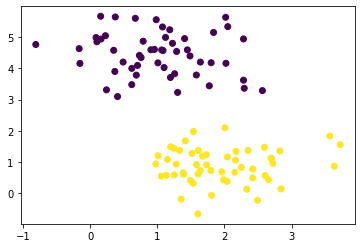

In [5]:
#create a scatter plot using the training data

#stores the first cluster in the first index position(purple)
#stores second cluster in the second index position(yellow)
#c allows the two clusters to be colour divied

#take all the first value of the rows from blob X, and then the second value of all the rows from blob X
plt.scatter(train_X[:,0], train_X[:,1],c=train_y)

We have divided the training set into two groups, purple and yellow, based on their x and y positions.  
This data can be easily separated by eyeballing a line without using any algorithm, however how do you know which line separates the data most accurately? The linear SVM algorithm finds the optimal line(hyperplane) using support vectors.  
The goal of the SVM is to find the biggest distance between the hyperplane and the support vectors. This is called a __margin__. A hyperplane is decided by finding the largest margins.

In [6]:
#linear kernel because data is linearly separable
svc = SVC(kernel='linear')
#train the support vector algorithm with training data
svc.fit(train_X,train_y)

SVC(kernel='linear')

Once the SVM is fitted with the training data, we are able categorize our data(classify) into classes/groups using the sklearn Support Vector Classification. In this case 0 and 1. By referring to the above graph we can see that the first 5 test samples are classified correctly.

In [7]:
print(test_X[:5])
print(svc.predict(test_X[:5]))

[[ 2.88688838  1.11952349]
 [ 0.50554777  4.05210011]
 [ 0.53224461  4.04986851]
 [ 1.48591254 -0.12883337]
 [ 3.1014067  -0.55132586]]
[1 0 0 1 1]


The next 5 samples are also classified correctly.

In [8]:
print(test_X[5:10])
print(svc.predict(test_X[5:10]))

[[1.70664481 2.2483361 ]
 [2.02776955 0.07999821]
 [1.50899649 4.38895984]
 [2.3223295  5.34014768]
 [0.69404622 5.15949888]]
[1 1 0 0 0]


This can be shown clearly if we introduce a hyperplane to our plot. 

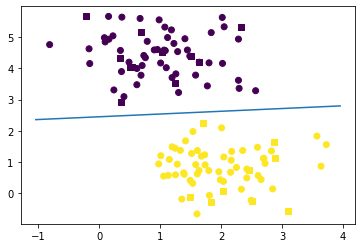

In [9]:
plt.scatter(train_X[:,0], train_X[:,1],c=train_y)

#get the axes
ax=plt.gca()
#range of x values
xlim= ax.get_xlim()
ylim= ax.get_ylim()

#add another scatter plot using the test set. Mark this plot using squares(marker='s')
ax.scatter(test_X[:,0], test_X[:,1],c=test_y, marker='s')

#Weights assigned to the features
w=svc.coef_[0]

#slope of line
a=-w[0]/w[1]

#range of x values for the hyperplane
xx=np.linspace(xlim[0],xlim[1])


#equation of the line
#slope * all the x values - the intercept
yy=a * xx-(svc.intercept_[0]/w[1])
plt.plot(xx,yy)
plt.show()

Thanks to the hyperplane, we can clearly see that all our test data, which is represented as squares, was classified correctly.

# Classifying the Wine Quality Dataset

## Understanding the dataset

In [10]:
#Libraries we will use
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from math import sqrt
#from prettytable import PrettyTable

In [11]:
df=pd.read_csv("winequality-red.csv",sep=";")
df.head(10)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In order to get a better understanding of this data, I can use a __correlation matrix__.

<AxesSubplot:>

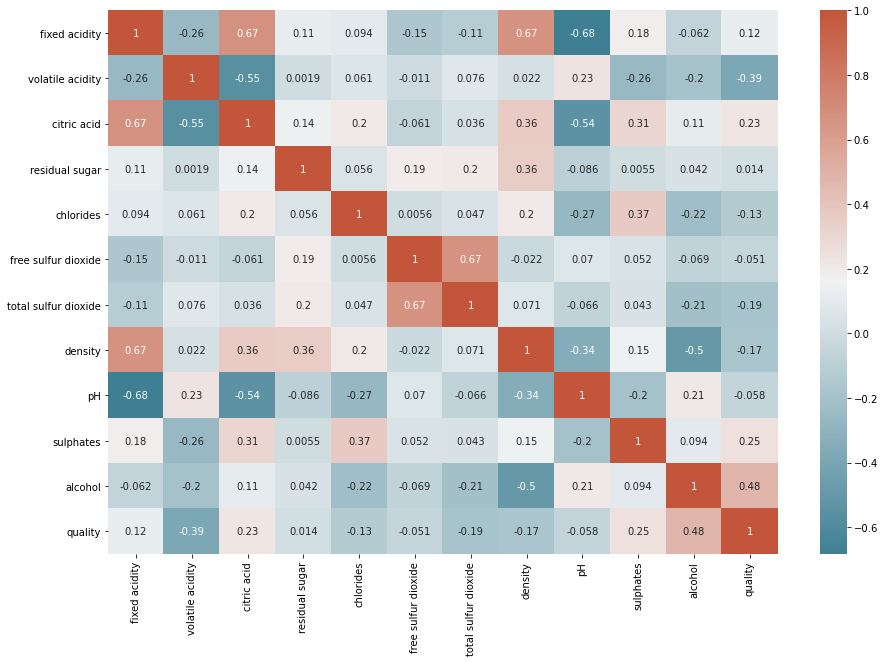

In [12]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

A correlation matrix gives us the correlation coefficient for every pair of features in the dataset.  
The formula returns a number between 1 and -1. What this means is:  
- A number close to 1 indicates a strong positive relationship between the two features.
- A number close to -1 indicates a strong negative relationship between the two features.
- 0 means there is no relationship. [14]

The matrix shows us that quality has the most correlations with other features. Its strongest correlation is alcohol content.  
Its second strongest correlation is volatile acidity, and its third strongest is sulphates.

In [13]:
x = df.groupby('quality')
x

In [14]:
x.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


## Quality vs alcohol
The two below graphs show me more details about the correlation between wine quallity and alcohol  
content. They show that generally, higher alcohol content is associated with higher quality wine.

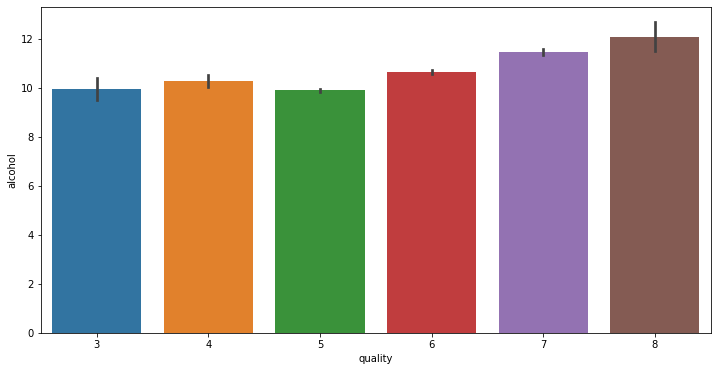

In [15]:
#plot alcohol vs quality, this shows us that as quality of wine increases
#so does the alcohol content
plt.figure(figsize=(12,6))
sns.barplot(x='quality', y='alcohol', data=df)
plt.show()

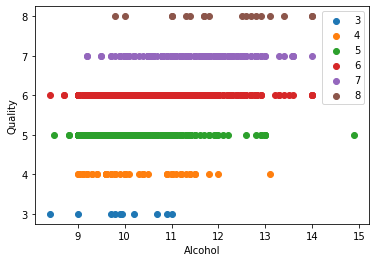

In [76]:
fig, ax = plt.subplots()

for quality, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['quality'], label=quality)

#Label the axes.
ax.set_xlabel('Alcohol')
ax.set_ylabel('Quality')
ax.legend();

# Prepare data for classification

## Imbalanced dataset

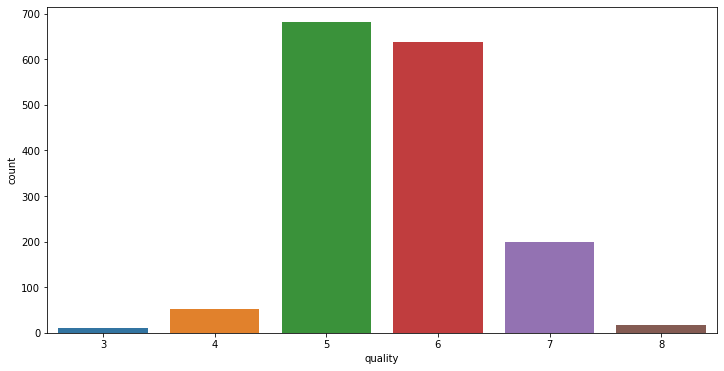

In [17]:
#Show distribution of qualities
plt.figure(figsize=(12,6))
x=df['quality']
sns.countplot(x=x)
plt.show()

The above plot shows us that there is an imbalance in this dataset. The amount of wine that has the qualities  
of 5 and 6 is very high in comparison to the others. The classes are not represented equally.

In [18]:
#count the exact amount of each quality
df.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


## Why does this matter?

If I train classification algorithms on this imbalanced dataset, I will get back a high classification accuracy.  
However, this accuracy will only apply to data that has the same imbalanced distribution.  
This means that I must fix this imbalance before I attempt to classify the data.[15]

In [19]:
#X has has the dependant variables
#drop all features except the quality 
x=df.drop(['quality'],axis=1)
y=df['quality']

### Over-sampling: SMOTE

The technique I will use to solve this issue is SMOTE(Synthetic Minority Oversampling Technique).

This strategy involves making additional samples for the elements that are in the minority.  In the case of this dataset,  
this technique will create additional datapoints or samples for the wine qualities other than 5,  
because quality 5 vastly outnumbers the rest. It will add enough to make the ratio of all qualities  
1:1. This fixes the imbalance of the dataset.

Y before resampling

In [33]:
y.count()

1599

In [20]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x_res,y_res=oversample.fit_resample(x,y)

In [21]:
df['quality'].count()

1599

SMOTE increased the amount of qualities to achieve a 1:1 ratio.

In [22]:
y_res.count()

4086

In [23]:
#split the balanced dataset into a training set and into a test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2, random_state=0)

### Scale/Standardise dataset

This is necessary because the distribution of data is not equal.  
Also, many estimators in sklearn behave badly if data is not standardised.

In [30]:
from sklearn.preprocessing import StandardScaler
stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_test_std = stdscale.transform(x_test)

In [31]:
x_test_std

array([[ 1.37398754, -0.8862751 ,  0.53380053, ..., -0.49579428,
         0.10050248, -0.05857412],
       [ 1.16527705,  0.23100768,  1.05076097, ..., -0.36419845,
        -0.64881611, -1.29548371],
       [-2.0196863 ,  1.73666483, -1.13256151, ...,  2.74027396,
        -1.0514304 , -0.18981099],
       ...,
       [-1.20214792, -0.20930065, -0.91881921, ...,  1.15176968,
         0.07208529,  0.24577814],
       [-1.12486133,  0.77997788, -1.36066873, ...,  1.32551585,
        -0.49309907, -0.67799671],
       [-1.73854177, -0.3692538 , -1.21338556, ...,  1.15176968,
         1.00956222,  2.82116875]])

In [32]:
x_train.count()

fixed acidity           3268
volatile acidity        3268
citric acid             3268
residual sugar          3268
chlorides               3268
free sulfur dioxide     3268
total sulfur dioxide    3268
density                 3268
pH                      3268
sulphates               3268
alcohol                 3268
dtype: int64

# Classification using the Decision Tree Algorithm (DTA)

A decision tree is a __supervised algorithm__ meaning it used labelled datasets. This algorithm asks multiple questions and classifies data based on the answer. The classification can be categorical, or numeric.  
Decision trees can combine these classification types in the same tree. Decision trees start at the top, and work their way down the tree until they reach the bottom leaf. This is how they classify samples, the bottom leaf is the classification.  


The very top of the tree is called the __root node__ or __The Root__. Internal nodes stem from the root, and from other internal nodes. Questions about the dataset are asked in these nodes,  
so in general, the more nodes the more accurate the classificaition. They have arrows pointing to them, and away from them. Lastly, there are leaf nodes.   
This is where a decision is made. These stem from internal nodes. They have arrows pointing to them, but no arrows pointing away from them. 

## How do I make a decision tree from raw data?

We want to predict the quality of wine, based on the features of the wine.

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
dt=DecisionTreeClassifier()
dt.fit(x_train_std, y_train)

DecisionTreeClassifier()

Here, I use the decision tree alogirthm to predict the quality of the wine in my test data set, based on the values it contains.

In [74]:
dt.predict(x_test_std)

array([7, 6, 4, 3, 7, 8, 8, 5, 8, 5, 3, 4, 5, 7, 7, 3, 8, 5, 7, 7, 3, 5,
       3, 8, 6, 6, 3, 5, 5, 4, 5, 3, 8, 8, 5, 7, 7, 5, 6, 3, 6, 4, 5, 8,
       3, 5, 8, 5, 7, 4, 5, 7, 4, 3, 6, 4, 7, 7, 7, 5, 7, 8, 3, 6, 5, 4,
       3, 8, 8, 5, 8, 8, 3, 7, 4, 3, 3, 7, 7, 5, 5, 8, 6, 8, 8, 4, 7, 8,
       7, 8, 7, 3, 7, 6, 4, 5, 5, 8, 4, 7, 5, 8, 3, 7, 4, 3, 8, 4, 8, 7,
       8, 6, 6, 5, 3, 3, 5, 7, 3, 5, 3, 8, 5, 6, 6, 5, 3, 5, 3, 3, 6, 5,
       6, 6, 5, 6, 8, 3, 7, 7, 3, 7, 5, 6, 4, 3, 8, 8, 7, 6, 6, 7, 5, 5,
       3, 5, 4, 3, 8, 8, 3, 6, 5, 6, 3, 7, 6, 8, 5, 8, 6, 3, 5, 6, 7, 4,
       4, 5, 5, 4, 5, 8, 7, 7, 7, 8, 5, 8, 3, 8, 4, 6, 5, 5, 3, 5, 7, 8,
       8, 8, 7, 5, 7, 3, 5, 7, 4, 5, 7, 7, 3, 8, 8, 8, 3, 5, 8, 4, 8, 7,
       8, 7, 8, 5, 7, 5, 4, 7, 5, 3, 7, 5, 6, 5, 6, 8, 8, 7, 3, 7, 5, 8,
       7, 7, 3, 5, 8, 4, 6, 6, 7, 6, 6, 4, 8, 4, 5, 3, 8, 4, 4, 3, 3, 8,
       6, 4, 8, 8, 5, 7, 7, 6, 7, 3, 6, 4, 7, 6, 8, 8, 5, 4, 5, 8, 4, 3,
       5, 6, 6, 6, 7, 7, 4, 7, 7, 7, 5, 4, 6, 8, 4,

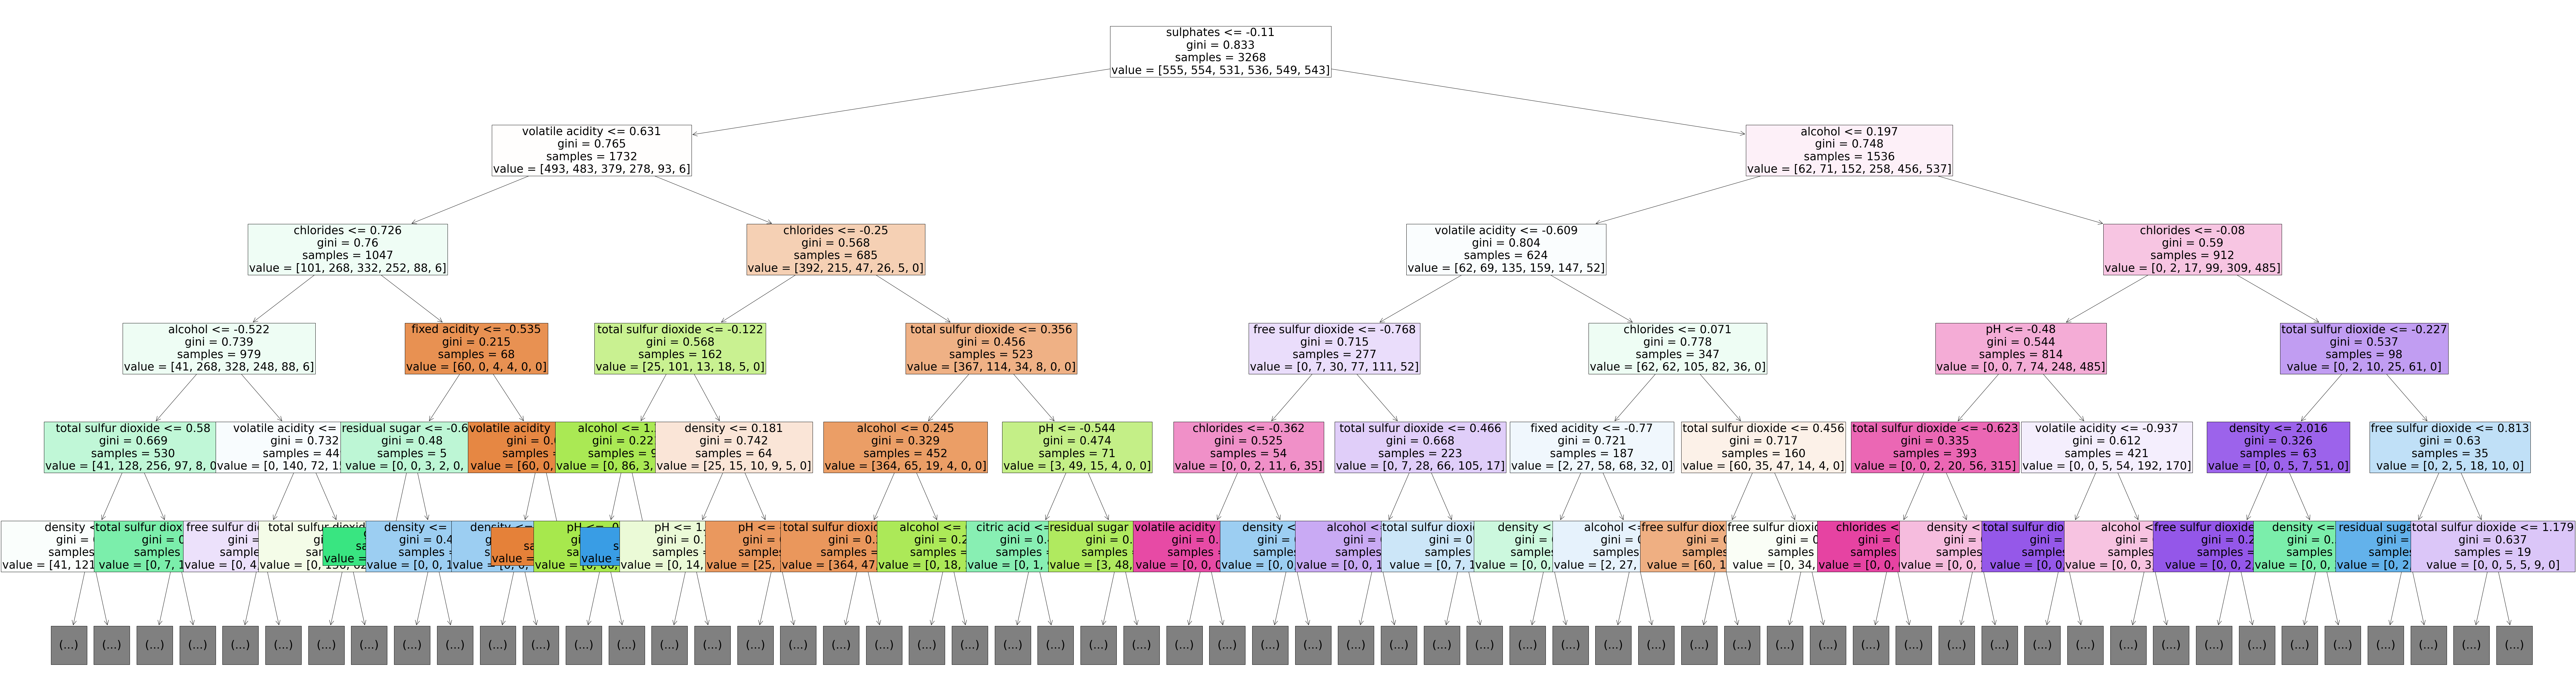

In [75]:
#make a new figure
fig = plt.figure(figsize=(140,40))
#plot the Decision Tree
#dt is the decision tree
plot = tree.plot_tree(dt, 
                      #Names of the features
                   feature_names=df.columns,
                    #Limit how far down the Decision Tree we'll go
                   max_depth=5,
                    #paint nodes to indicate majority class for classification [16]
                   filled=True,
                    fontsize=35)

The above graph that visualises the decision tree. As we can see, the root node asks a question relating to the sulphates of the samples. If the amount of sulphates in the samples was less than -0.097, then they were put into the right internal node.  
Opposite that, if sulphates were above -0.097, then they were put into the left internal node. After this, these internal nodes then asked a further question about the value of some feature of the samples in those internal nodes, creating another split. This continues, until the algorithm is able to predict the quality of the wine.

## How does the decision tree (DTA) know how to split? How does it know what questions to ask?


At the start, the DTA splits the node on all available features. It selects the split which results in the most homogeneous sub nodes. __Homogenous__ here means having similar behaviour or attributes in respect to the problem that we have,  
which is figuring out wine quality. When the nodes are entirely pure, each node will only contain one class or in other words there will be only one wine quality. 

There are multiple algorithms that are used by DTA to decide the best split for the problem. The most common and popular one, is __Gini Impurity__.

### Gini Impurity

The Gini impurity calculates impurity of the nodes.  
__Gini__ is the idea that if we pick two samples out of a node, then they must be of the same class. If the node is pure, then the probality of this is __1__.  
Gini impurity for a split is calculated by :
Calculating the gini for the subnodes of the potential internal nodes. This is calculated by:

$1-Gini$

Where Gini is the sum of sum of the square of probability for success for each class/category:

$Gini=p_1 ^2+p_2^2+p_3^2+...+p_n^2$

$(p^2+q^2)$

Then, we must calculate Gini for that split using weighted Gini score of each node of that split. This is done with the weighted gini impurity of that split.   
The DTA then compares the weighted impurity of both splits, and whichever split has the higher weighted gini impurity, gets used. [17]

### Accuracy

We see that our decision tree is 79.7% accurate. __Bagging__ can be used to improve the accuracy.

In [67]:
accuracy_score(y_test,dt.predict(x_test_std))

0.7958435207823961

## Bagging

Bagging is an ensemble method used to improve the prediction accuracy of decision trees. This is necessary because decision trees are sensitive to the dataset on which they are trained. For example, if the tree is trained on a subset of the original dataset, or if some values were changed, then the classification of the tree will be very different. This is a could result in high variance/overfitting. 

The basic technique behind bagging is to use many decision trees to come to a classification. This is done by creating several data subsets from the data set used to train the model. Then, each subset is used to train a new decision tree resulting in several trees. The classification is then based on the average of the prediction of each tree.  
For example, if the bagged trees made the following classification predictions: Male, Male, Male, Female, Male, Female ; then the most frequent classification is used and the prediction would be that the sample is Male. 

The only parameter used when bagging is the number of samples/the number of trees to produce. [18]

In [68]:
from sklearn.ensemble import BaggingClassifier

#Estimators here refers to the number of bagged trees created
bdt=BaggingClassifier(n_estimators=10, random_state=0)
bdt.fit(x_train_std, y_train)

predictions=bdt.predict(x_test_std)
accuracy_score(y_test,predictions)

0.8215158924205379

As we can see, the accuracy of the decision tree has gone up from 79.7% to 82.15% due to the use of bagging.  
In the above case we used 10 bagged trees. Let's see what happens if we increase this number.

In [80]:
bdt=BaggingClassifier(n_estimators=200, random_state=0)
bdt.fit(x_train_std, y_train)

predictions=bdt.predict(x_test_std)
accuracy_score(y_test,predictions)

0.8422982885085575

As we can see, in general as we increase the amount of bagged trees, the accuracy score goes up.

## Random Forest Classifier 

Random forest is a supervised learning algorithms. They build multiple decision trees and merge them together in order to get a more accurate description. They are actually an improvement over __decision tree bagging__.   
Random Forests are much less sensitive to the training data.

Bagging only has one parameter, the number of trees to produce. Random Forests improve on this by introducing a second parameter, the number of features.  
While decision tree bagging works by creating subsets with every feature, Random Forest selects a random features w to include in the subsets that are used to train each decision tree.  
A random forest is the collection of decision trees trained in this manner. The classification is decided by calculating the average of each decision tree.


In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_std, y_train)

RandomForestClassifier()

In [72]:
predictions=rf.predict(x_test_std)
accuracy_score(y_test,predictions)

0.8569682151589242

# Quantum Computing 

## What is it?
A quantum computer works by controlling electrons and photons in a way that is completely different from a regular computer. A quantum computer is not just a more powerful version of our current computers.  
A quantum computer is a new kind of device that is based on the science of quantum physics.  
In classic computers, bits are either 0 or a 1. However, a quantum bit is more fluid. It can be in any proportion/hybrid position of both 0 and 1. This is called a superposition. As long as a qbit is unobserved, the qbit is in a superposition of 0 and 1 and its value cannot be predicted. However, the instant you measure it, it will collapse into either 0 or 1.  
Four classical computer bits can be in one of 16 possible combinations.
Four qbits in superposition can be in all of these states at once. The number of combinations grows exponentially as qbits are added. 
The state of qbits is usually represented using complex numbers while bits are represented as integers.

## References
[1] https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htm  

[2] https://www.edureka.co/blog/classification-in-machine-learning/  

[3] https://medium.datadriveninvestor.com/regression-in-machine-learning-296caae933ec  

[4] https://developers.google.com/machine-learning/clustering/overview  

[5] https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/  

[6] https://scikit-learn.org/stable/getting_started.html  

[7] https://scikit-learn.org/stable/glossary.html#term-feature  

[8] https://scikit-learn.org/stable/tutorial/basic/tutorial.html#loading-an-example-dataset

[9] https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html  

[10] https://scikit-learn.org/stable/modules/grid_search.html  

[11] https://www.analyticsvidhya.com/blog/2014/10/support-vector-machine-simplified/?utm_source=blog&utm_medium=understandingsupportvectormachinearticle  

[12] https://www.geeksforgeeks.org/creating-linear-kernel-svm-in-python/  

[13] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[14] https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/  

[15] https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

[16]  https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

[17]  https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/  

[18] https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/

[19] https://www.w3schools.com/python/numpy/numpy_intro.asp

[20] https://www.w3schools.com/python/scipy/scipy_intro.php